import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from time import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
hr = pd.read_csv("C:/Users/Lenovo/Desktop/DATA SETS/HR Analytics.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.isnull().sum().head()

Age               0
Attrition         0
BusinessTravel    0
DailyRate         0
Department        0
dtype: int64

In [6]:
hr['BusinessTravel'] = hr['BusinessTravel'].map( {'Travel_Rarely':2, 'Travel_Frequently':3,'Non-Travel':1})

In [7]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
le = LabelEncoder()
for column in hr.columns:
    if hr[column].dtype == type(object):
        hr[column] = le.fit_transform(hr[column])
        
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [42]:
# Droping below column

hr_final = hr.drop(['EmployeeCount','Over18','StandardHours'],axis=1)

In [14]:
hr_final.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

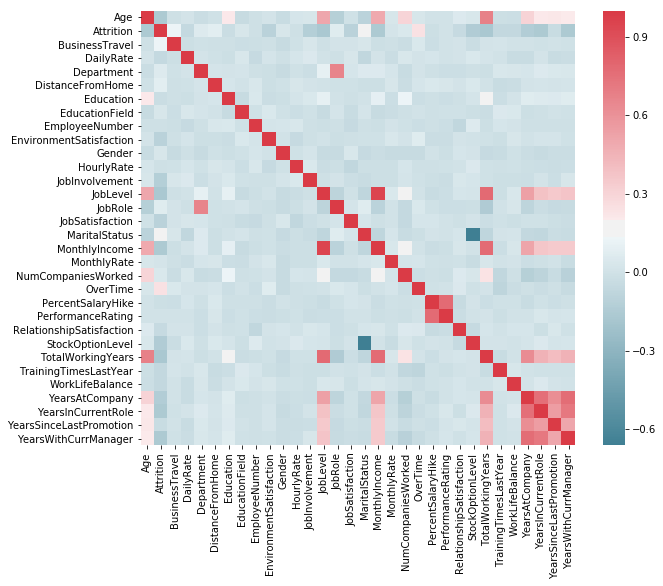

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = hr_final.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [26]:
x = hr_final[['Age', 'BusinessTravel', 'DailyRate',
       'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender',
       'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction',
       'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y = hr_final['Attrition']

In [27]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=1)

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
print("kNN Score=",knn.score(x_test,y_test)*100)        


prediction = knn.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print("Confusion matrix is:", cm ,sep='\n')

kNN Score= 81.29251700680273
Confusion matrix is:
[[226  10]
 [ 45  13]]


### -------------------------------------------Gaussian----------------------------------------------------------------------

In [14]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_pred = gnb.predict(x_test)

print("accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

accuracy(in %): 84.6938775510204


In [16]:
cm = confusion_matrix(y_test,y_pred)
print("confusion Matrix is:", cm, sep = '\n')

confusion Matrix is:
[[220  16]
 [ 29  29]]


In [21]:
probs = gnb.predict_proba(x_test)
probs

array([[7.19301349e-01, 2.80698651e-01],
       [6.37586086e-02, 9.36241391e-01],
       [2.12470350e-01, 7.87529650e-01],
       [5.40758243e-01, 4.59241757e-01],
       [9.99054282e-01, 9.45717556e-04],
       [8.83153469e-01, 1.16846531e-01],
       [9.96676384e-01, 3.32361570e-03],
       [7.87262787e-01, 2.12737213e-01],
       [9.63604294e-01, 3.63957056e-02],
       [9.36154166e-01, 6.38458341e-02],
       [9.99960357e-01, 3.96432298e-05],
       [9.62032843e-01, 3.79671568e-02],
       [2.60163438e-01, 7.39836562e-01],
       [9.38636431e-01, 6.13635688e-02],
       [5.23439676e-01, 4.76560324e-01],
       [9.96985304e-01, 3.01469589e-03],
       [9.30392249e-01, 6.96077510e-02],
       [4.05131100e-01, 5.94868900e-01],
       [5.44632832e-01, 4.55367168e-01],
       [9.60816384e-01, 3.91836156e-02],
       [8.60330114e-01, 1.39669886e-01],
       [5.55642103e-01, 4.44357897e-01],
       [9.74212357e-01, 2.57876431e-02],
       [8.53581123e-01, 1.46418877e-01],
       [5.411839

In [22]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)
print('Threshold:', threshold)

Area under the curve: 0.8145090590298072
Threshold: [1.93624139e+00 9.36241391e-01 9.35727946e-01 8.61803580e-01
 8.56529604e-01 8.52272000e-01 8.43501978e-01 8.32910965e-01
 8.24820502e-01 7.60494997e-01 7.44682463e-01 7.11193290e-01
 6.95774097e-01 6.60701672e-01 6.42130863e-01 6.38692371e-01
 6.35346993e-01 6.34728062e-01 6.18505486e-01 6.09928792e-01
 6.08645104e-01 5.54770977e-01 5.44421543e-01 5.24659305e-01
 5.05306641e-01 4.98987818e-01 4.93785027e-01 4.84969278e-01
 4.55367168e-01 4.44495757e-01 4.35766352e-01 4.22729491e-01
 4.01802181e-01 4.00164828e-01 3.99954379e-01 3.99028774e-01
 3.92996585e-01 3.86463020e-01 3.40657129e-01 3.28665953e-01
 2.92717481e-01 2.91532226e-01 2.87326079e-01 2.80698651e-01
 2.68015339e-01 2.67228894e-01 2.40813035e-01 2.39006782e-01
 1.66709694e-01 1.65851439e-01 1.01134658e-01 9.94075103e-02
 8.75866768e-02 8.71342736e-02 6.18637582e-02 6.13635688e-02
 3.89847785e-02 3.79671568e-02 2.53361409e-02 2.52740466e-02
 9.83257132e-03 9.70708802e-03 7.

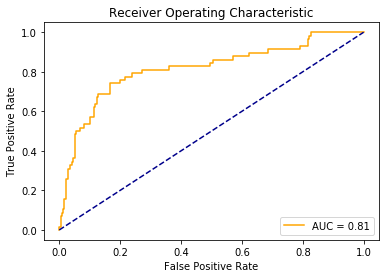

In [23]:
# plot ROC curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ----------------------------------------------------------Bernoulli-----------------------------------------------------------

In [17]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [18]:
y_pred = bnb.predict(x_test)

print("accuracy(in %):" , metrics.accuracy_score(y_test,y_pred)*100)

accuracy(in %): 81.29251700680273


In [24]:
probs_bnb = bnb.predict_proba(x_test)
prob_positive = probs_bnb[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)
print('Threshold:', threshold)

Area under the curve: 0.7345485096434833
Threshold: [1.9740317  0.9740317  0.90710901 0.74435922 0.7193761  0.70230377
 0.67500513 0.62662815 0.47876583 0.46800097 0.4453466  0.43119408
 0.42667116 0.40449627 0.3941386  0.38049705 0.35921835 0.33619447
 0.30407807 0.29994201 0.25512715 0.24421086 0.22038148 0.21722535
 0.20209868 0.19298664 0.19127766 0.18635014 0.17766321 0.17289859
 0.17027396 0.16487091 0.14483737 0.13789535 0.13775797 0.12739385
 0.11661587 0.11460973 0.10577351 0.09319566 0.09250137 0.08288616
 0.08187176 0.06943067 0.06738054 0.06186378 0.05325229 0.05071832
 0.04888544 0.04358621 0.03997853 0.03993418 0.03661722 0.03260229
 0.02987536 0.02341371]


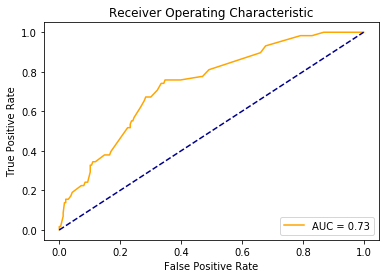

In [25]:
# plot ROC curve for Bernaulli

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ---------------------------------------------------------MultinomialNB---------------------------------------------------------

In [19]:
## Now from multinom

mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
y_pred = mnb.predict(x_test)

print("accuracy score:", metrics.accuracy_score(y_test,y_pred)*100)

accuracy score: 54.421768707483


In [26]:
probs_mnb = mnb.predict_proba(x_test)
prob_positive = probs_mnb[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)
print('Threshold:', threshold)

Area under the curve: 0.6052746931618935
Threshold: [2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 9.99999998e-001 9.99999997e-001 9.99999995e-001
 9.99999991e-001 9.99999975e-001 9.99999707e-001 9.99999502e-001
 9.99998804e-001 9.99997873e-001 9.99995810e-001 9.99981968e-001
 2.79044858e-001 2.28999703e-001 2.95641534e-007 1.38764140e-007
 5.75456697e-009 8.12633074e-010 1.01324198e-011 9.03540697e-012
 3.14332291e-014 2.51779025e-014 1.94235701e-015 8.76412413e-017
 5.49779809e-017 4.91494236e-017 5.50743419e-018 4.53109737e-018
 1.52455490e-025 6.64768771e-026 4.97517728e-032 2.12776780e-032
 3.62605413e-034 9.73521171e-035 9.86340015e-045 7.70353006e-045
 2.00101322e-051 5.72662069e-052 8.11738281e-057 5.27987439e-063
 1.82928219e-065 5.99818239e-067 3.93645262e-073 1.00586763e-074
 5.46192746e-087 4.84199722e-089 2.07198419e-232]


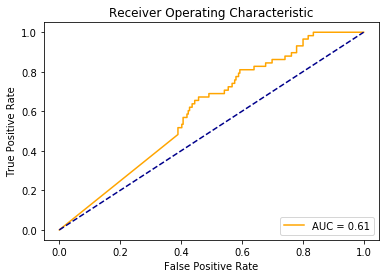

In [27]:
# plot ROC curve for Multinomial

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ''So Gaussian Naive Base is giving the best accuracy score'' 

# Logistic Regression 

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
print("Log reg score on hr_fianl data set", model.score(x_test, y_test))

Log reg score on hr_fianl data set 0.8197278911564626


In [31]:
y_pred = model.predict(x_test)# this is prediciting the values for the xtest
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [32]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[228   8]
 [ 45  13]]


In [33]:
probs_log = model.predict_proba(x_test)
prob_positive = probs_log[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.843001168907072


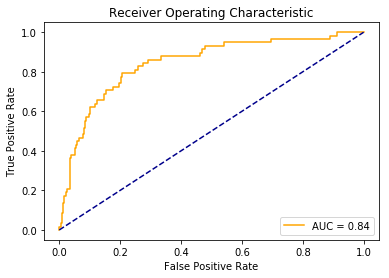

In [34]:
# plot ROC curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# required library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
#Encoding
#Try label encoding

x_dummies = pd.get_dummies(x)
x_dummies.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,1,2,0,4,2,5993,8,1,11,1,8,1,6,4,0,5
1,49,3,279,8,3,1,2,1,5130,1,0,23,4,10,3,10,7,1,7
2,37,2,1373,2,4,1,3,2,2090,6,1,15,2,7,3,0,0,0,0
3,33,3,1392,3,4,0,3,1,2909,1,1,11,3,8,3,8,7,3,0
4,27,2,591,2,1,1,2,1,3468,9,0,12,4,6,3,2,2,2,2


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_dummies,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [38]:
#Compute accuracy and Display confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[330  41]
 [ 46  24]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       371
           1       0.37      0.34      0.36        70

    accuracy                           0.80       441
   macro avg       0.62      0.62      0.62       441
weighted avg       0.80      0.80      0.80       441



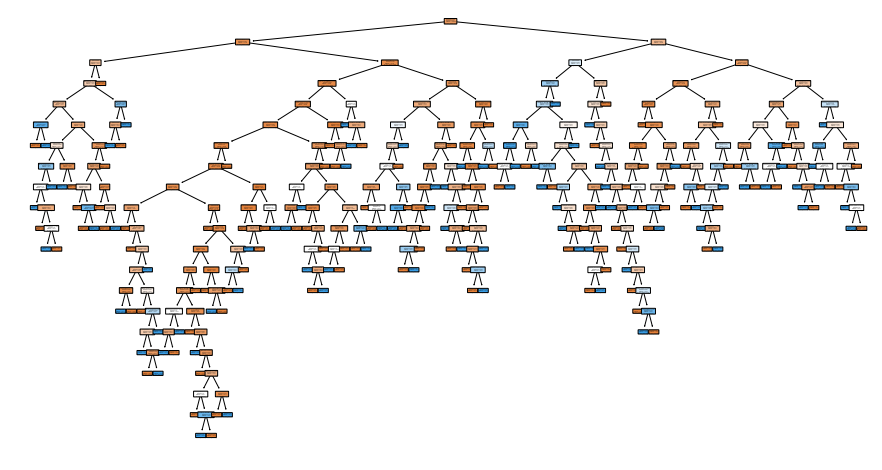

In [39]:
cols=list(x_dummies.columns.values)
cols
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [41]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

90.09

# Random Forest Classification

In [45]:
from sklearn.ensemble import RandomForestClassifier
#create the test/train split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.4,random_state=1)

In [46]:
#Create the model and train
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
#Predict the results for test
test_pred=model.predict(x_test)

In [48]:
#test the accuracy
accuracy_score(y_test,test_pred)

0.8350340136054422

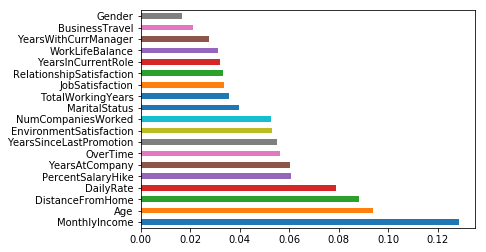

In [51]:
feat_importance=pd.Series(model.feature_importances_,index=x.columns)
feat_importance=feat_importance.nlargest(20)
feat_importance.plot(kind='barh')

Looks Like Monthly income contribute more in Atrrition of employees.